# Histogram and Intensity Transformations

A histogram is a basic tool for understanding and manipulating images. Histogram counts the number of occurrences of the intensity values of pixels in the images.

Intensity transformations refer to mathematical functions applied to pixel intensities to manipulate the image contrast and appearance by changing the intensity values of each pixel based on a specific transformation function, often using information from the image's histogram to guide the adjustment

This lab covers following topics
* Histogram of an image
* Image enhancement: Point-wise intensity transformation
    - Log Transformation
    - Gamma Correction


In [32]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

### <font color="green">Histogram</font>

For opencv, we use following function to compute an image histogram

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- **images**: it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- **channels**: it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- **mask**: mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- **histSize**: this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- **ranges** : this is our RANGE. Normally, it is [0,256].


In [34]:
# Reading images of different tones. 
h_image = cv2.imread('../images/p04/highkey.png',0)
h_hist = cv2.calcHist([h_image], [0], None, [256], [0, 256])

m_image = cv2.imread('../images/p04/middle_key.png',0)
m_hist = cv2.calcHist([m_image], [0], None, [256], [0, 256])

image = cv2.imread('../images/p04/dark_keySky.png',0)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

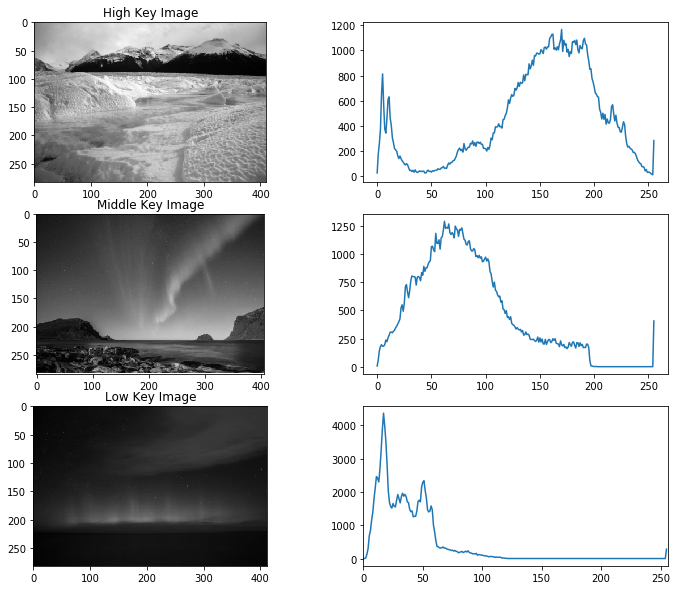

In [35]:

plt.figure(figsize=[12,10])
plt.gray()
plt.subplot(321)
plt.imshow(h_image);plt.title('High Key Image')
plt.subplot(322)
plt.plot(h_hist)

plt.subplot(323)
plt.imshow(m_image);plt.title('Middle Key Image')
plt.subplot(324)
plt.plot(m_hist)

plt.subplot(325)
plt.imshow(image);plt.title('Low Key Image')
plt.subplot(326)
plt.plot(hist)
plt.xlim([0, 256]) 
plt.show()


Instead of creating 256 points on histogram graph. It is a common practice to group values before displaying them on a histogram. For example, we can create bins with a size of 20. This means that all values within 0 to 20, 20 to 40, and so on, will be represented with a single bar. The bins make it much easier to display and analyse the data distribution.

In [47]:
print ("A number of bins : ", hist.shape)

A number of bins :  (20, 1)


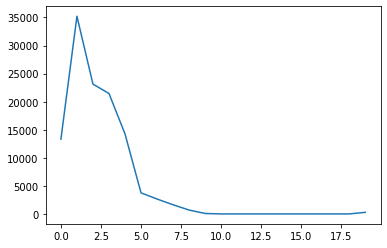

A number of Bins : (20, 1)


In [49]:
# Using 10 bins for a histogram 

hist = cv2.calcHist([image], [0], None, [20], [0, 256])
plt.plot(hist)
plt.show()

print ("A number of Bins :", hist.shape)

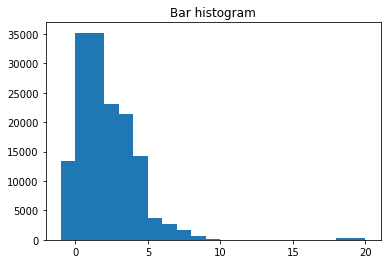

In [50]:
# Ploting a histogram using bar graph

index = np.array([x for x in range(hist.shape[0])])
plt.bar(index, hist[:,0], width = 2)
plt.title("Bar histogram")
plt.show()

We can convert this in to a probability  function by normalizing it by the number of pixels:

In [51]:
norm_hist = hist / (image.shape[0] * image.shape[1])

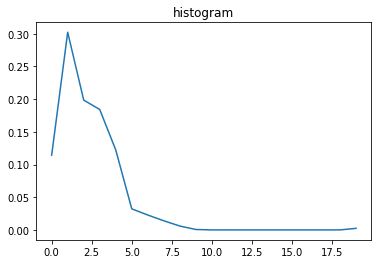

In [67]:
plt.plot(index,norm_hist)
plt.title("histogram")
plt.show()

### Histogram of color images
For color images, we often apply a histogram  to each color component. 


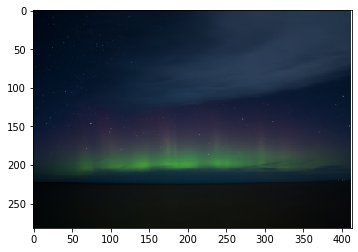

In [72]:
# reading and displaying an example image 
img = cv2.imread('../images/p04/highkey.png')
plt.imshow(cv2.cvtColor(baboon,cv2.COLOR_BGR2RGB))
plt.show()

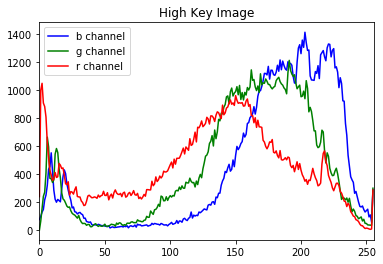

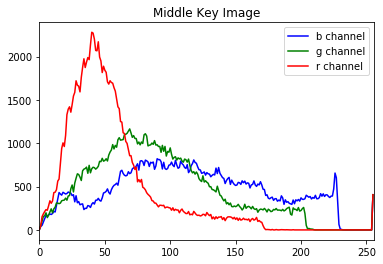

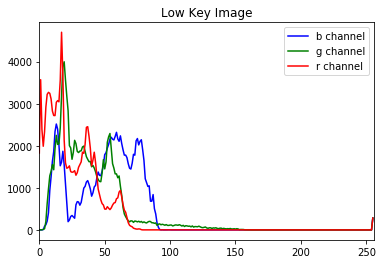

In [77]:
# Loop to compute each color channel's histogram

color = ('b','g','r')
# We now separate the colors and plot each in the Histogram
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col,label=col+" channel")
    plt.xlim([0,256])
plt.legend()
plt.title("High Key Image")
plt.show()

image = cv2.imread('../images/p04/middle_key.png')
# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col,label=col+" channel")
    plt.xlim([0,256])
plt.legend()
plt.title("Middle Key Image")
plt.show()

image = cv2.imread('../images/p04/dark_keySky.png')

for i, col in enumerate(color):
    histogram1 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram1, color = col,label=col+" channel")
    plt.xlim([0,256])
plt.legend()
plt.title("Low Key Image")    
plt.show()

!!! Histogram is a global information. Two different images can have the same Histogram

### Intensity Transformations
We can apply a transformation  𝑇 to the image and get a new image:
$$
g(x,y)=T(f(x,y))
$$

### Brightness and contrast adjustments
We can use multiplication by $\alpha$ for contrast control and addition by $\beta$ for brightness control. The image is $f(x,y)$ and the transformed image is $g(x,y)$, where 
$$g(x,y) = \alpha f(x,y) + \beta$$.

we can perform this transformation functin using openCV  <code>convertScaleAbs</code>. It scales, calculates absolute values, and converts the result to 8-bit so the values fall between  \[0,255]
 . For brightness control, we can set 𝛼 to 1 and 𝛽 to 100:

Define two functions for plotting 

In [80]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

In [114]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

In [99]:
img = cv2.imread('../images/p03/abhi_bw.tif') 

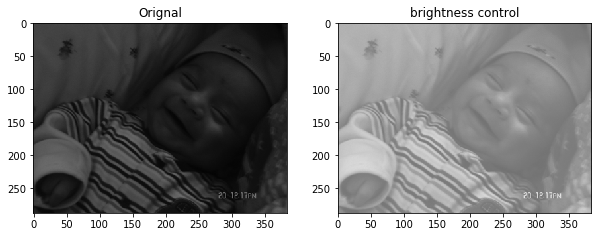

In [110]:

alpha = 1 # Simple contrast control
beta = 110   # Simple brightness control   
new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

plot_image(img, new_image, title_1 = "Orignal", title_2 = "brightness control")

We can increase the contrast by increasing $\alpha$:


<Figure size 720x360 with 0 Axes>

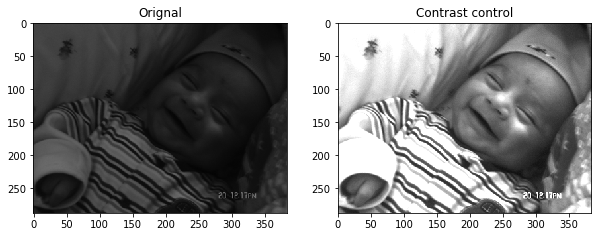

In [117]:
plt.figure(figsize=(10,5))
alpha = 4 # Simple contrast control
beta = 0 # Set brightness control to none
new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

plot_image(img, new_image, title_1 = "Orignal", title_2 = "Contrast control")

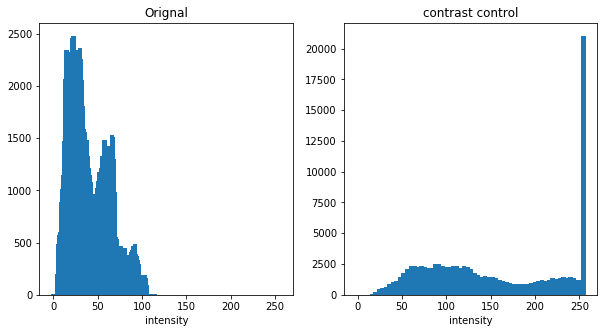

In [118]:
plt.figure(figsize=(10,5))

plot_hist(img, new_image,"Orignal","contrast control")

<Figure size 864x360 with 0 Axes>

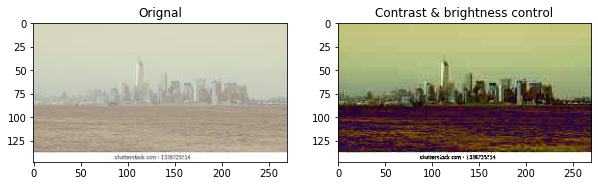

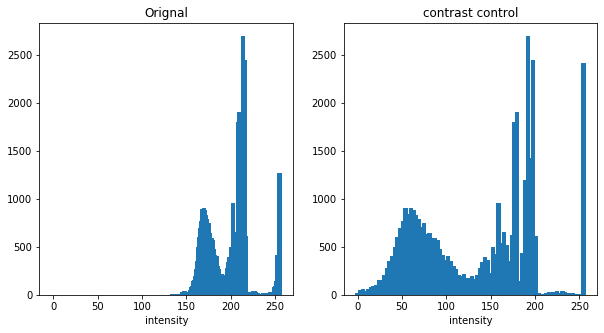

In [149]:
img = cv2.imread('../images/city.jpg') 

alpha = 3 # Simple contrast control
beta = -450  # Simple brightness control   
new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

plt.figure(figsize=(12,5))
plot_image(img, new_image, title_1 = "Orignal", title_2 = "Contrast & brightness control")
plt.figure(figsize=(10,5))
plot_hist(img, new_image,"Orignal","contrast control")

### Log Transformation

The general form of the log transformation
$$g(x,y)= c.log(1+f(x,y))$$
where c = 255/(log(1+ maximum intensity value in the input image)

<Figure size 720x288 with 0 Axes>

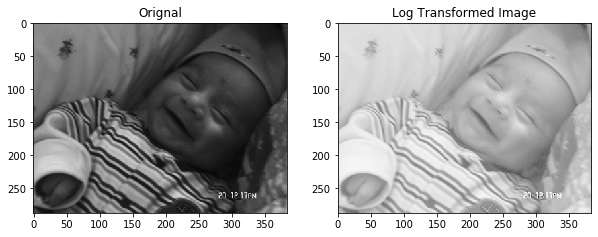

In [167]:
# Open the image. 
img = cv2.imread('../images/p03/abhi_bw.tif',0) 
 
# Apply log transform. 
c = 255/(np.log(1 + np.max(img))) 
log_transformed = c * np.log(1 + img) 
  
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8) 
  
# Show the images
plt.figure(figsize=[10,4])
plot_image(img, log_transformed, title_1 = "Orignal", title_2 = "Log Transformed Image")

### Power-law (gamma) Transformaiton

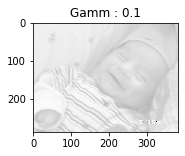

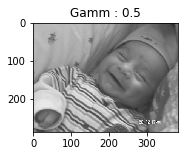

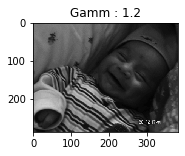

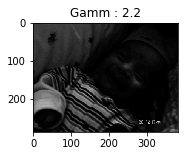

In [166]:
# Trying 4 gamma values. 
i = 1

for gamma in [0.1, 0.5, 1.2, 2.2]: 
      
    # Apply gamma correction. 
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
    plt.figure(figsize=[5,2])
    plt.imshow(gamma_corrected, cmap='gray');  plt.title("Gamm : "+str(gamma));
    plt.show()

### Question

- Write a a program to perform contrast stretching using a piece-wise linear transformation function, as illustrated in the provided figure. The transformation consists of three segments:
   
(0, 0) to (r1, s1)\
(r1, s1) to (r2, s2)\
(r2, s2) to (255, 255)\

<img src="../images/pieceWiseFN.png" width="220" height="200">,

Your task is to:
- Apply the transformation to both grayscale and color images.
- Experiment with different values for the parameters (r1,s1,r2,r1,s1,r2, and s2s2, as well as the slope for each segment.) and observe the results.
- Analyze and discuss any challenges or issues that arise (e.g., artifacts, over/under enhancement, or color distortion in color images).

In [4]:
# Write your code here

In [5]:
# Your analysis and discussions go here